### Look at Tallo and BAAD for species in FATES-MRV projects

#### Libraries 

In [2]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

#import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import cm

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [3]:
cultivo_sp = ['Pinus pseudostrobus',
'Pinus leiophylla',
'Pinus devoniana',
'Pinus lawsonii',
'Pinus pringlei',
'Pinus teocote',
'Abies religiosa',
'Quercus laurina',
'Quercus rugosa',
'Quercus obtusata',
'Quercus resinosa',
'Arbutus xalapensis',
'Alnus jorullensis',
'Clethra mexicana',
'Ternstroemia pringlei',
'Ilex brandegeana']


### Read in Tallo and BAAD data

In [4]:
# Note these dataframes were processed in the notebook  v2_Tallo_analysis_global.ipynb
df_tallo = pd.read_csv('/pscratch/sd/j/jneedham/trait_data/df_tallo.csv')
df_baad = pd.read_csv('/pscratch/sd/j/jneedham/trait_data/df_baad.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/pscratch/sd/j/jneedham/trait_data/df_tallo.csv'

In [ ]:
print(df_tallo.head(3))
#  remove rows with NA for species
df_tallo = df_tallo.dropna(subset=['species'])

### USA

#### Hybrid Populus tremula × Populus alba

In [ ]:
# find the two 'parent' species
populus_alba = df_tallo[df_tallo['species'].str.contains('Populus alba', case=False)]
populus_tremula = df_tallo[df_tallo['species'].str.contains('Populus tremula', case=False)]

populus = pd.concat([populus_alba, populus_tremula], axis=0)

In [ ]:
def d2hmc (d, p1, p2, p3) :
    h = (p1 * d**p2) / (p3 + d**p2)
    return h

initial_guess = [58.0, 0.73, 21.8]


In [ ]:
pop_h =  populus.dropna(subset=['height', 'dbh'])
# remove outliers
pop_h = pop_h[pop_h['height_outlier'] == 'N']
pop_h = pop_h[pop_h['dbh'] < 100]
dbh_pop_h = np.arange(1,pop_h['dbh'].max(),1)

height_ps_pop, height_cov_pop = curve_fit(f=d2hmc, xdata=np.array(pop_h['dbh']), ydata=np.array(pop_h['height']),
                                           p0=initial_guess)
pop_curve_h = [d2hmc(d, height_ps_pop[0], height_ps_pop[1], height_ps_pop[2])  for  d  in dbh_pop_h]

palba_h = pop_h[pop_h['species']  ==  'Populus alba']
ptrem_h = pop_h[pop_h['species']  ==  'Populus tremula']

print(height_ps_pop)

In [ ]:
def d2ca (d, p1, p2) :
    ca = p1 * d ** p2
    return ca

In [ ]:
pop_ca = populus.dropna(subset=['crown_area','dbh'])
# remove outliers
pop_ca = pop_ca[pop_ca['crown_radius_outlier'] == 'N']
pop_ca = pop_ca[pop_ca['dbh'] < 100]
dbh_pop_ca = np.arange(1,pop_ca['dbh'].max(),1)

initial_guess = [0.07, 1.3]

ca_ps_pop, ca_cov_pop = curve_fit(f=d2ca, xdata=np.array(pop_ca['dbh']), ydata=np.array(pop_ca['crown_area']), p0=initial_guess)

pop_curve_ca = [d2ca(d, ca_ps_pop[0], ca_ps_pop[1])  for  d  in dbh_pop_ca]
palba_ca = pop_ca[pop_ca['species']  ==  'Populus alba']
ptrem_ca = pop_ca[pop_ca['species']  ==  'Populus tremula']

print(ca_ps_pop)

In [ ]:
fig, ((fax0,fax1)) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

fax0.scatter(palba_h.dbh, palba_h.height, c='goldenrod', s=2, label = 'Populus alba')
fax0.scatter(ptrem_h.dbh, ptrem_h.height, c='purple', s=2, label = 'Populus tremula')
fax0.plot(dbh_pop_h, pop_curve_h, color='red')
fax0.set_title('Populus - height', fontsize=16)
fax0.set_ylabel('Height (m)', fontsize=16)
fax0.set_xlabel('DBH (cm)', fontsize=16)

    
fax1.scatter(palba_ca.dbh, palba_ca.height, c='goldenrod', s=2, label = 'Populus alba')
fax1.scatter(ptrem_ca.dbh, ptrem_ca.height, c='purple', s=2, label = 'Populus tremula')
fax1.plot(dbh_pop_ca, pop_curve_ca, color='red')
fax1.set_title('Populus - crown area', fontsize=16)
fax1.set_ylabel('Crown area (m2)', fontsize=16)
fax1.set_xlabel('DBH (cm)', fontsize=16)
fax1.legend(fontsize=13)    

# Get the legend object
legend = fax1.get_legend()
for legobj in legend.legendHandles:
    legobj.set_sizes([10])
    
plt.savefig('/global/homes/j/jneedham/jupyter_notebooks/mrv_figs/Populus_CA_height.png', facecolor='white')    

### Get the wood  density of populus - mean of the two species
These species aren't  in BAAD so we can't get AGB parameters 

In [ ]:
df_wd = pd.read_csv('/pscratch/sd/j/jneedham/trait_data/wood_density_utf8.csv')

# remove the outlier
max_index = df_wd['wood_dens'].idxmax()
print(df_wd.loc[max_index])

df_wd = df_wd[df_wd['wood_dens'] < 20.0]

df_wd_mean = df_wd.groupby('ScientificName')['wood_dens'].mean().reset_index()
print(df_wd_mean.head(4))

In [ ]:
# populus wd
pop_alba_wd = df_wd_mean[df_wd_mean['ScientificName'].str.contains('Populus alba', case=False)]
pop_trem_wd = df_wd_mean[df_wd_mean['ScientificName'].str.contains('Populus tremula', case=False)]

print(pop_alba_wd)
print(pop_trem_wd)

pop_wd = np.mean([pop_alba_wd.wood_dens, pop_trem_wd.wood_dens])

print(pop_wd)

### For the remaining species filter by east coast of USA and get deciduous broadleaf and evergreen needleleaf

In [ ]:
df_tallo_usae = df_tallo[(df_tallo['latitude'] >= 25) & (df_tallo['latitude'] <= 55) & 
                         (df_tallo['longitude'] >= -85) & (df_tallo['longitude'] <= -67)]


fig1, ((f1ax0)) = plt.subplots(nrows=1, ncols=1,  subplot_kw={'projection': ccrs.PlateCarree()},
                                                   figsize=(16,6))

f1ax0.scatter(df_tallo_usae.longitude, df_tallo_usae.latitude, color='red', s=1, marker='o',  alpha=0.4, transform=ccrs.PlateCarree())
f1ax0.coastlines()
f1ax0.set_title('All species', fontsize=15)

In [ ]:
df_tallo_usae['PFT_tallo'].unique()

In [ ]:
# Let's assume all broadleaf are deciduous and all needleleaf are evergreen
def condition(x) : 
    if x == 'broadleaf_extratrop':
        return 'broadleaf_deciduous_extratrop'
    elif x == 'needleleaf_extratrop': 
        return 'needleleaf_evergreen_extratrop'
    else : 
        return x
    
df_tallo_usae.loc[:,('PFT_tallo')] = df_tallo_usae.loc[:,('PFT_tallo')].apply(condition).values

print(df_tallo_usae['PFT_tallo'].unique())

#### Fit height

In [ ]:
initial_guess = [58.0, 0.73, 21.8]

titles = ['Broadleaf deciduous', 'Needleleaf evergreen']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=True, sharey=True, constrained_layout=True)
  
for i  in range(0,2): 
    if i == 0: 
        df =  df_tallo_usae[df_tallo_usae['PFT_tallo'] == 'broadleaf_deciduous_extratrop']
    elif i == 1:
        df =  df_tallo_usae[df_tallo_usae['PFT_tallo'] == 'needleleaf_evergreen_extratrop']
   

    df =  df.dropna(subset=['height', 'dbh'])
    # remove outliers
    df = df[df['height_outlier'] == 'N']
    dbh_df = np.arange(1,df['dbh'].max(),1)

    height_ps_df, height_cov_df = curve_fit(f=d2hmc, xdata=np.array(df['dbh']), ydata=np.array(df['height']),
                                               p0=initial_guess)
    
    print(height_ps_df)
    
    df_curve = [d2hmc(d, height_ps_df[0], height_ps_df[1], height_ps_df[2])  for  d  in dbh_df]


    axs[i].scatter(df.dbh, df.height, c='blue', s=2, alpha = 0.4)
    axs[i].plot(dbh_df, df_curve, color='red')
    axs[i].set_title(titles[i], fontsize=20)
    
fig.supylabel('Height (m)', fontsize=20)
fig.supxlabel('DBH (cm)', fontsize=20)


#### Fit crown areas 

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=True, sharey=True, constrained_layout=True)
  
for i  in range(0,2): 
    if i == 0: 
        df =  df_tallo_usae[df_tallo_usae['PFT_tallo'] == 'broadleaf_deciduous_extratrop']
    elif i == 1:
        df =  df_tallo_usae[df_tallo_usae['PFT_tallo'] == 'needleleaf_evergreen_extratrop']
   
    df =  df.dropna(subset=['crown_area', 'dbh'])
    # remove outliers
    df = df[df['crown_radius_outlier'] == 'N']
    dbh_df = np.arange(1,df['dbh'].max(),1)

    axs[i].scatter(df.dbh, df.crown_area, c='blue', s=2, alpha = 0.4)
    axs[i].set_title(titles[i], fontsize=20)
    
    ca_ps_df, ca_cov_df = curve_fit(f=d2ca, xdata=np.array(df['dbh']), ydata=np.array(df['crown_area']),
                                               p0=[0.07, 1.3])
    
    print(ca_ps_df)
    
    df_curve = [d2ca(d, ca_ps_df[0], ca_ps_df[1])  for  d  in dbh_df]
    axs[i].plot(dbh_df, df_curve, color='red')

fig.supylabel('Crown area (m2)', fontsize=20)
fig.supxlabel('DBH (cm)', fontsize=20)


#### Wood density

In [ ]:
# Subset BAAD data by east coast USA

In [ ]:
df_baad_usae = df_baad[(df_baad['latitude'] >= 25) & (df_baad['latitude'] <= 55) & 
                         (df_baad['longitude'] >= -85) & (df_baad['longitude'] <= -67)]


fig1, ((f1ax0)) = plt.subplots(nrows=1, ncols=1,  subplot_kw={'projection': ccrs.PlateCarree()},
                                                   figsize=(16,6))

f1ax0.scatter(df_baad_usae.longitude, df_baad_usae.latitude, color='red', s=5, marker='o',  alpha=0.4, transform=ccrs.PlateCarree())
f1ax0.coastlines()
f1ax0.set_title('All species', fontsize=15)

In [ ]:
# Merge DataFrames based on matching values in 'x' and 's'
merged_df = df_baad_usae.merge(df_wd_mean, left_on='species', right_on='ScientificName', how='left')
merged_df['wd'] = merged_df['wood_dens'].fillna(merged_df['wd'])
merged_df = merged_df.drop(columns=['wood_dens'])
df_baad_usae = merged_df

In [ ]:
print(df_baad_usae.head(3))

print(df_baad_usae['PFT_baad'].unique())

In [ ]:
df_baad_usae.groupby(['PFT_baad']).mean()

#### AGB 

In [ ]:
# Needleleaf evergreen extra tropical 
nleex = df_baad_usae[df_baad_usae.PFT_baad=='needleleaf_evergreen_extratrop']
nleex =  nleex.dropna(subset=['agb', 'dbh'])
dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

initial_guess = [0.0673, 0.976]

def dh2bagw_nleex (d, p1, p2) :
    
    # set fixed parameters
    wd = 0.371920
    h1 = 52.69707617
    h2 = 0.94855988
    h3 = 46.79252608
    
    h = (h1 * d**h2) / (h3 + d*h2)
    
    agb = ( p1 * (wd * d**2 * h)**p2 ) / 2
    
    return agb


agb_ps_nleex, agb_cov_nleex = curve_fit(f=dh2bagw_nleex, xdata=np.array(nleex['dbh']), ydata=np.array(nleex['agb']),
                                           p0=initial_guess)

dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

nleex_curve = [dh2bagw_nleex(d, agb_ps_nleex[0], agb_ps_nleex[1])  for  d  in dbh_nleex]

plt.scatter(nleex.dbh, nleex.agb, s=0.9, color='blue')
plt.plot(dbh_nleex, nleex_curve, color='red')
plt.xlabel('DBH (cm)')
plt.ylabel('AGB (kg)')
plt.title('Needleleaf evergreen  extra tropical')

print(agb_ps_nleex)

In [ ]:
# Broadleaf deciduous extra tropical 
nleex = df_baad_usae[df_baad_usae.PFT_baad=='broadleaf_deciduous_extratrop']
nleex =  nleex.dropna(subset=['agb', 'dbh'])
dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

initial_guess = [0.0673, 0.976]

def dh2bagw_nleex (d, p1, p2) :
    
    # set fixed parameters
    wd = 0.582007
    h1 = 46.09820802
    h2 = 0.93277477
    h3 = 28.84758308
    
    h = (h1 * d**h2) / (h3 + d*h2)
    
    agb = ( p1 * (wd * d**2 * h)**p2 ) / 2
    
    return agb


agb_ps_nleex, agb_cov_nleex = curve_fit(f=dh2bagw_nleex, xdata=np.array(nleex['dbh']), ydata=np.array(nleex['agb']),
                                           p0=initial_guess)

dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

nleex_curve = [dh2bagw_nleex(d, agb_ps_nleex[0], agb_ps_nleex[1])  for  d  in dbh_nleex]

plt.scatter(nleex.dbh, nleex.agb, s=0.9, color='blue')
plt.plot(dbh_nleex, nleex_curve, color='red')
plt.xlabel('DBH (cm)')
plt.ylabel('AGB (kg)')
plt.title('Broadleaf deciduous  extra tropical')

print(agb_ps_nleex)

### AGB but using poplar height and wd parameters

In [ ]:
# Broadleaf deciduous extra tropical 
nleex = df_baad_usae[df_baad_usae.PFT_baad=='broadleaf_deciduous_extratrop']
nleex =  nleex.dropna(subset=['agb', 'dbh'])
dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

initial_guess = [0.0673, 0.976]

def dh2bagw_nleex (d, p1, p2) :
    
    # set fixed parameters
    wd = 0.4712021328783584
    h1 = 30.84653668   
    h2 = 1.10525761
    h3 = 18.05775934
    
    h = (h1 * d**h2) / (h3 + d*h2)
    
    agb = ( p1 * (wd * d**2 * h)**p2 ) / 2
    
    return agb


agb_ps_nleex, agb_cov_nleex = curve_fit(f=dh2bagw_nleex, xdata=np.array(nleex['dbh']), ydata=np.array(nleex['agb']),
                                           p0=initial_guess)

dbh_nleex = np.arange(1,nleex['dbh'].max(),1)

nleex_curve = [dh2bagw_nleex(d, agb_ps_nleex[0], agb_ps_nleex[1])  for  d  in dbh_nleex]

plt.scatter(nleex.dbh, nleex.agb, s=0.9, color='blue')
plt.plot(dbh_nleex, nleex_curve, color='red')
plt.xlabel('DBH (cm)')
plt.ylabel('AGB (kg)')
plt.title('Broadleaf deciduous  extra tropical')

print(agb_ps_nleex)

#  Mexico

####  Oaks  - none in Mexco

In [25]:
quercus = df_tallo[df_tallo['species'].str.contains('Quercus', case=False)]
print(quercus.head(3))
print(len(quercus))

                 species  latitude  longitude  dbh  height height_outlier  \
1813      Quercus kerrii    18.617    108.951  3.0     5.0              N   
1898  Quercus macrocalyx    18.683    108.876  3.0     4.5              N   
2020    Quercus auricoma    18.731    109.867  3.0     7.0              N   

      crown_radius_m crown_radius_outlier           PFT_tallo  crown_area  
1813             0.5                    N  broadleaf_tropical    0.785398  
1898             0.6                    N  broadleaf_tropical    1.130973  
2020             0.6                    N  broadleaf_tropical    1.130973  
69107


Text(0.5, 1.0, 'Quercus')

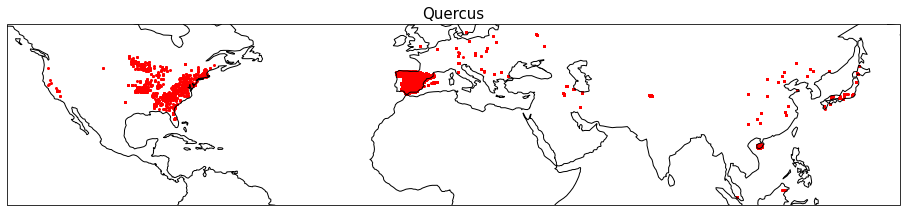

In [26]:
fig1, ((f1ax0)) = plt.subplots(nrows=1, ncols=1,  subplot_kw={'projection': ccrs.PlateCarree()},
                                                   figsize=(16,6))

f1ax0.scatter(quercus.longitude, quercus.latitude, color='red', s=4, marker='o', transform=ccrs.PlateCarree())
f1ax0.coastlines()
f1ax0.set_title('Quercus', fontsize=15)

(-120.0, -86.0)

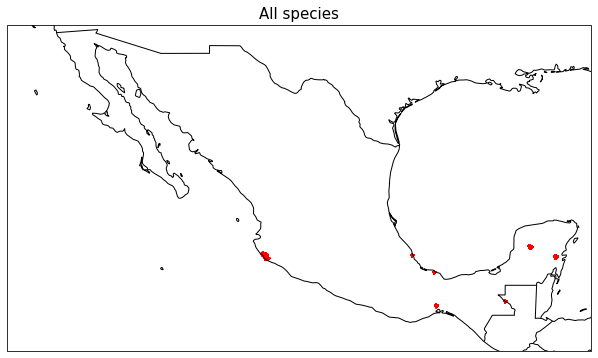

In [27]:
# Define the bounding box coordinates for Mexico
north_lat = 30.
south_lat = 14.
west_lon = -120.
east_lon = -86.

# Filter the DataFrame to include only coordinates within the bounding box
df_tallo_mx = df_tallo[
    (df_tallo['latitude'] >= south_lat) &
    (df_tallo['latitude'] <= north_lat) &
    (df_tallo['longitude'] >= west_lon) &
    (df_tallo['longitude'] <= east_lon)
]

fig1, ((f1ax0)) = plt.subplots(nrows=1, ncols=1,  subplot_kw={'projection': ccrs.PlateCarree()},
                                                   figsize=(16,6))

f1ax0.scatter(df_tallo_mx.longitude, df_tallo_mx.latitude, color='red', s=5, marker='o',  alpha=0.4, transform=ccrs.PlateCarree())
f1ax0.coastlines()
f1ax0.add_feature(cf.BORDERS)
f1ax0.set_title('All species', fontsize=15)
f1ax0.set_ylim(14, 33)
f1ax0.set_xlim(-120, -86) 

In [28]:
len(df_tallo_mx['species'].unique())

497

In [29]:
print(df_tallo_mx['PFT_tallo'].unique())

['broadleaf_tropical']


In [30]:
# Divide into needleleaf and broadleaf -  regardless of deciduous/evergreen and extratropical/tropical
def condition(x) : 
    if x == 'broadleaf_tropical':
        return 'broadleaf'
    elif x == 'needleleaf_evergreen_extratrop': 
        return 'needleleaf'
    elif x == 'needleleaf_extratrop':
        return 'needleleaf'
    elif x == 'broadleaf_extratrop': 
        return 'broadleaf'
    elif x == 'broadleaf_deciduous_extratrop': 
        return 'broadleaf'
    elif x == 'broadleaf_evergreen_extratrop': 
        return 'broadleaf'
    else : 
        return x
    
df_tallo_mx.loc[:,('PFT_tallo')] = df_tallo_mx.loc[:,('PFT_tallo')].apply(condition).values

print(df_tallo_mx['PFT_tallo'].unique())

['broadleaf']


/global/homes/j/jneedham/.conda/envs/myenv/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### Height

[65.13455603  0.60662789 26.41808279]


Text(0.5, 0.01, 'DBH (cm)')

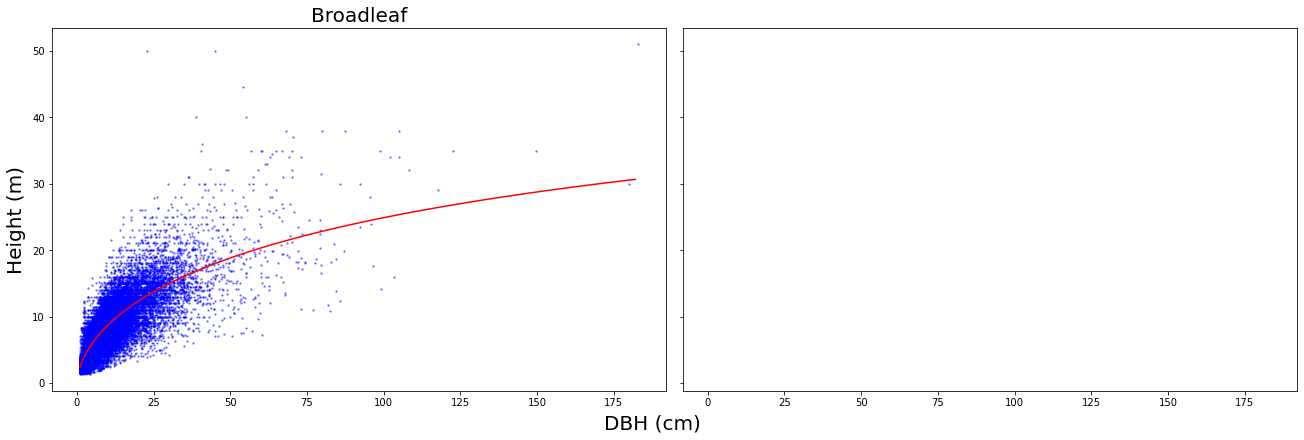

In [31]:
titles = ['Broadleaf']
initial_guess = [58.0, 0.73, 21.8]


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=True, sharey=True, constrained_layout=True)
  
for i  in range(0,1): 
    if i == 0: 
        df =  df_tallo_mx[df_tallo_mx['PFT_tallo'] == 'broadleaf']
    elif i == 1:
        df =  df_tallo_mx[df_tallo_mx['PFT_tallo'] == 'needleleaf']
   

    df =  df.dropna(subset=['height', 'dbh'])
    # remove outliers
    df = df[df['height_outlier'] == 'N']
    dbh_df = np.arange(1,df['dbh'].max(),1)

    height_ps_df, height_cov_df = curve_fit(f=d2hmc, xdata=np.array(df['dbh']), ydata=np.array(df['height']),
                                               p0=initial_guess)
    
    print(height_ps_df)
    
    df_curve = [d2hmc(d, height_ps_df[0], height_ps_df[1], height_ps_df[2])  for  d  in dbh_df]


    axs[i].scatter(df.dbh, df.height, c='blue', s=2, alpha = 0.4)
    axs[i].plot(dbh_df, df_curve, color='red')
    axs[i].set_title(titles[i], fontsize=20)
    
fig.supylabel('Height (m)', fontsize=20)
fig.supxlabel('DBH (cm)', fontsize=20)


#### Crown area

[0.07811211 1.77653554]


Text(0.5, 0.01, 'DBH (cm)')

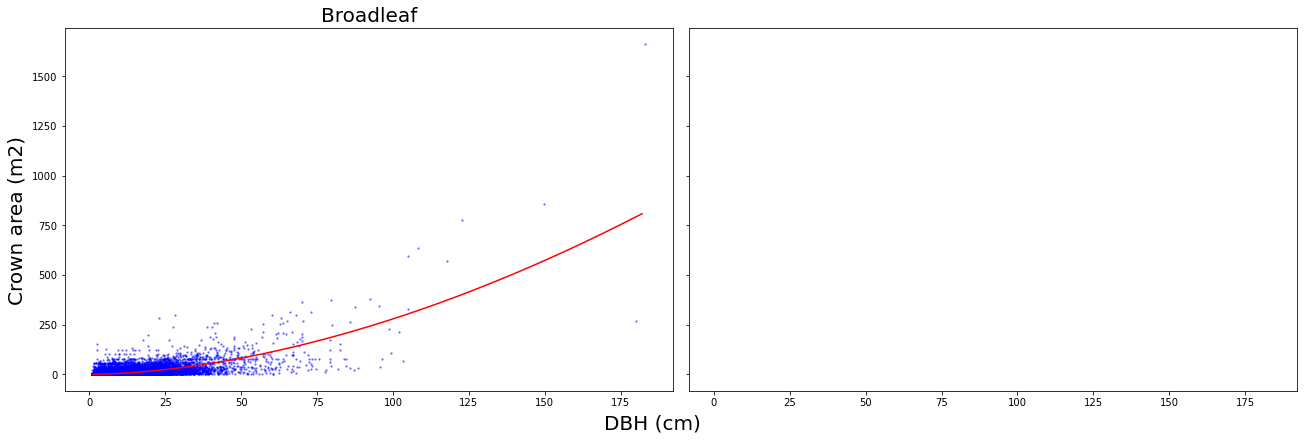

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=True, sharey=True, constrained_layout=True)
  
for i  in range(0,1): 
    if i == 0: 
        df =  df_tallo_mx[df_tallo_mx['PFT_tallo'] == 'broadleaf']
    elif i == 1:
        df =  df_tallo_mx[df_tallo_mx['PFT_tallo'] == 'needleleaf']
   

    df =  df.dropna(subset=['crown_area', 'dbh'])
    # remove outliers
    df = df[df['crown_radius_outlier'] == 'N']
    dbh_df = np.arange(1,df['dbh'].max(),1)

    axs[i].scatter(df.dbh, df.crown_area, c='blue', s=2, alpha = 0.4)
    axs[i].set_title(titles[i], fontsize=20)
    
    ca_ps_df, ca_cov_df = curve_fit(f=d2ca, xdata=np.array(df['dbh']), ydata=np.array(df['crown_area']),
                                               p0=[0.07, 1.3])
    
    print(ca_ps_df)
    
    df_curve = [d2ca(d, ca_ps_df[0], ca_ps_df[1])  for  d  in dbh_df]
    axs[i].plot(dbh_df, df_curve, color='red')
    
fig.supylabel('Crown area (m2)', fontsize=20)
fig.supxlabel('DBH (cm)', fontsize=20)


#### AGB - use BAAD data

In [33]:
# Define the bounding box coordinates for Mexico
north_lat = 30.
south_lat = 14.
west_lon = -120.
east_lon = -86.

# Filter the DataFrame to include only coordinates within the bounding box
df_baad_mx = df_baad[
    (df_baad['latitude'] >= south_lat) &
    (df_baad['latitude'] <= north_lat) &
    (df_baad['longitude'] >= west_lon) &
    (df_baad['longitude'] <= east_lon)
]

print(df_baad_mx.head(3))

print(df_baad_mx.species.unique())

Empty DataFrame
Columns: [PFT_baad, family, species, latitude, longitude, dbh, height, crown_area, agb, wd, bleaf]
Index: []
[]


#### No species - from Mexican sites in BAAD